In [1]:
import romberg as r
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from math import *

In [2]:
r.polint?

Signature:   r.polint(*args, **kwargs)
Type:        fortran
String form: <fortran function polint>
Docstring:  
y,err = polint(xx,yy,x)

Wrapper for ``polint``.

Parameters
----------
xx : input rank-1 array('d') with bounds (n)
yy : input rank-1 array('d') with bounds (n)
x : input float

Returns
-------
y : float
err : float

In [3]:
r.trapzd?

Signature:   r.trapzd(*args, **kwargs)
Type:        fortran
String form: <fortran function trapzd>
Docstring:  
sout = trapzd(func,a,b,sin,n,[func_extra_args])

Wrapper for ``trapzd``.

Parameters
----------
func : call-back function
a : input float
b : input float
sin : input float
n : input int

Other Parameters
----------------
func_extra_args : input tuple, optional
    Default: ()

Returns
-------
sout : float

Notes
-----
Call-back functions::

    def func(b): return a
    Required arguments:
        b : input float
    Return objects:
        a : float

In [4]:
r.qromb?

Signature:   r.qromb(*args, **kwargs)
Type:        fortran
String form: <fortran function qromb>
Docstring:  
ss,dss,numcalls = qromb(func,a,b,[eps,k,func_extra_args])

Wrapper for ``qromb``.

Parameters
----------
func : call-back function
a : input float
b : input float

Other Parameters
----------------
func_extra_args : input tuple, optional
    Default: ()
eps : input float, optional
    Default: 1e-06
k : input int, optional
    Default: 5

Returns
-------
ss : float
dss : float
numcalls : int

Notes
-----
Call-back functions::

    def func(y2): return y1
    Required arguments:
        y2 : input float
    Return objects:
        y1 : float

## Graphing the transformed integrand

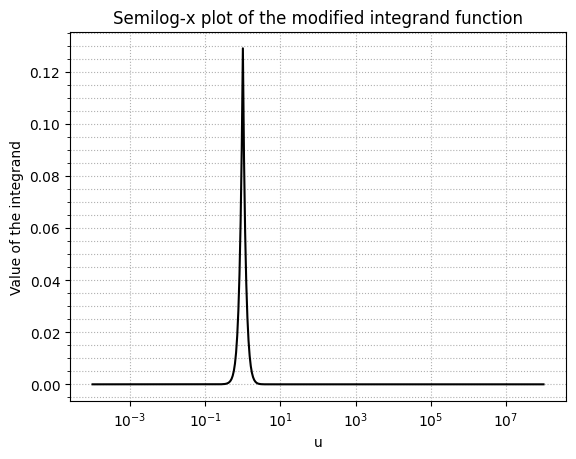

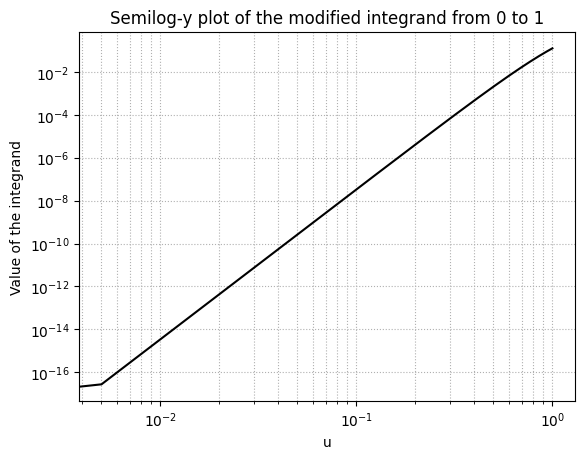

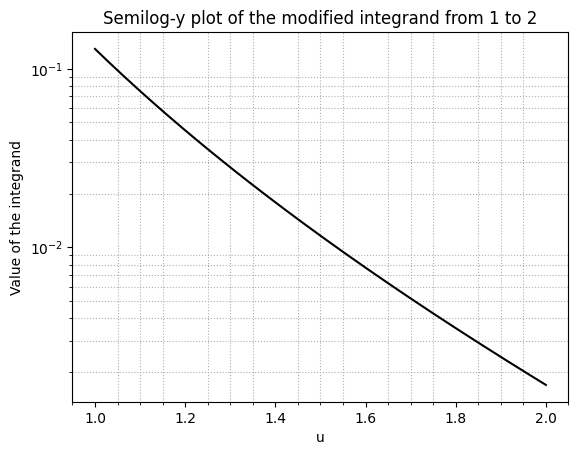

In [5]:
# defining the integrand from 0 to 1
def func1(u):
    return 2*((sp.special.jn(3,2.7*u))**2)*u

# defining the integrand from 1 to infinity
def func2(u):
    return 2*(np.abs(sp.special.jn(3,2.7)/sp.special.kn(3,1.2))**2)*(sp.special.kn(3,1.2*u)**2)*u

# defining the integrand
def integrand(u):
    if u <= 1:
        return func1(u)
    else:
        return func2(u)

# plotting the integrand
x = np.logspace(-4,8,400)
y = [integrand(xi) for xi in x]
plt.semilogx(x,y,color='black')
plt.grid(which='both', linestyle=':', linewidth=0.8)
plt.minorticks_on()
plt.title("Semilog-x plot of the modified integrand function")
plt.xlabel("u")
plt.ylabel("Value of the integrand")
plt.show()

x = np.linspace(0,1,200)
y = [integrand(xi) for xi in x]
plt.loglog(x,y,color='black')
plt.grid(which='both', linestyle=':', linewidth=0.8)
plt.minorticks_on()
plt.title("Semilog-y plot of the modified integrand from 0 to 1")
plt.xlabel("u")
plt.ylabel("Value of the integrand")
plt.show()

x = np.linspace(1,2,2000)
y = [integrand(xi) for xi in x]
plt.semilogy(x,y,color='black')
plt.grid(which='minor', linestyle=':', linewidth=0.8)
plt.minorticks_on()
plt.title("Semilog-y plot of the modified integrand from 1 to 2")
plt.xlabel("u")
plt.ylabel("Value of the integrand")
plt.show()

## Analytically bounding the integrand

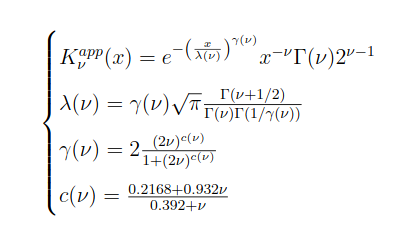

ref : Approximations of the modified Bessel functions of the second
kind Kν . Applications in random field generation.
D. I. Palade and L. Pomarjanschi

In [6]:
v = 3
c = (0.2168 + 0.932*v)/(0.392+v)
gamma = 2*((2*v)**c)/(1+(2*v)**c)
lamb = gamma*np.sqrt(np.pi)*(sp.special.gamma(v+1/2))/(sp.special.gamma(v)*(sp.special.gamma(1/gamma)))
print("Value of c : ",c)
print("Value of gamma : ", gamma)
print("value of lambda : ",lamb)

Value of c :  0.8882075471698114
Value of gamma :  1.6616412243333274
value of lambda :  3.295483808078559


Define $\alpha = g^{-v-1}\dfrac{\lambda}{\gamma}|\dfrac{J_v(2.7)}{K_v(1.2)}|^2\Gamma(v)^22^{2v-2}$  and $\beta = \dfrac{2g\gamma}{\lambda}$, we obtain an upper bound for the integral for large $a$ as $ I < \alpha e^{-\beta a}$

In [7]:
alpha = 4*((2/1.2)**4)*(lamb/gamma)*np.abs(sp.special.jn(3,2.7)/sp.special.kn(3,1.2))**2
beta = 2.4*gamma/lamb
print("Value of alpha : ", alpha)
print("Value of beta : ", beta)

Value of alpha :  0.25831685019553513
Value of beta :  1.2101224495850775


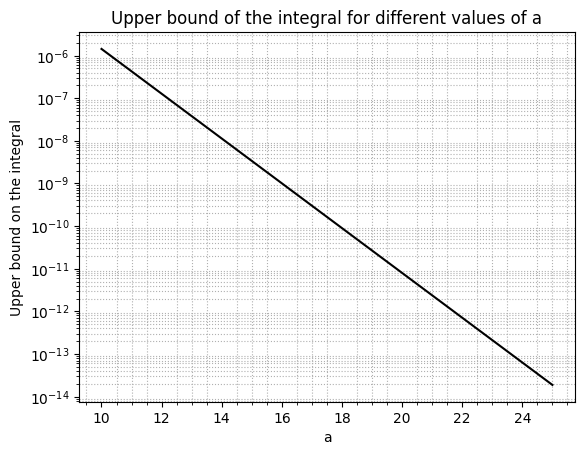

In [8]:
# plotting the upper bound for different values of a

a_vals = np.linspace(10,25,1000)
bounds = [alpha*np.exp(-beta*a) for a in a_vals]
plt.semilogy(a_vals,bounds,color='black')
plt.title("Upper bound of the integral for different values of a")
plt.grid(which='minor', linestyle=':', linewidth=0.8)
plt.minorticks_on()
plt.xlabel("a")
plt.ylabel("Upper bound on the integral")
plt.show()

We see that $a = 20$ gives the upper bound of the integration to be around $10^{-11}$, thus it is sufficient for tolerance of $10^{-10}$

## Using scipy.integrate.quad

In [9]:
sp.integrate.quad(integrand,0,20, full_output=1)

(0.046038860280000066,
 6.9239211447635896e-09,
 {'neval': 567,
  'last': 14,
  'iord': array([         1,          5,          7,          4,          8,
                  9,         10,          3,         11,         12,
                  6,         13,         14,          2,   95443718,
         1078538331,   95443718, 1078538331,   95443718, 1078538331,
           95443718, 1078538331,   95443718, 1078538331,   95443718,
         1078538331,   95443718, 1078538331,   95443718, 1078538331,
           95443718, 1078538331,   95443718, 1078538331,   95443718,
         1078538331,   95443718, 1078538331,   95443718, 1078538331,
           95443718, 1078538331,   95443718, 1078538331,   95443718,
         1078538331,   95443718, 1078538331,   95443718, 1078538331],
        dtype=int32),
  'alist': array([ 0.99853516, 10.        ,  5.        ,  2.5       ,  1.25      ,
          0.        ,  0.625     ,  1.09375   ,  1.015625  ,  0.9375    ,
          0.9765625 ,  1.00585938,  1.000976

In [10]:
exact = sp.special.jn(3,2.7)**2-sp.special.jn(4,2.7)*sp.special.jn(2,2.7)+abs(sp.special.jn(3,2.7)/sp.special.kn(3,1.2))**2*(sp.special.kn(4,1.2)*sp.special.kn(2,1.2)-sp.special.kn(3,1.2)**2)
print("The exact value of the integral : ", exact)

The exact value of the integral :  0.04603886027986452


In [11]:
print("The error in scipy integral integrating from 0 to a(20) : ",np.abs(sp.integrate.quad(integrand,0,20)[0] - exact))

The error in scipy integral integrating from 0 to a(20) :  1.355443535189238e-13


## Using trapezoidal algorithm

In [12]:
# redefining the integrand function to include the global variable count
count = 0
def integrand(u):
    global count
    count += 1
    if u <= 1:
        return func1(u)
    else:
        return func2(u)

count_trap = []
err_trap = []
s = 0
for i in range(1,20):
    s=r.trapzd(integrand,0,20,s,i)
    count_trap.append(count)
    err_trap.append(np.abs(s-exact))
    print("%1d %.15f %.2e %1d"%(i,s,np.abs(s-exact),count))
    count=0

1 0.000000000000000 4.60e-02 2
2 0.000000000008383 4.60e-02 1
3 0.000001289283323 4.60e-02 2
4 0.000787977244362 4.53e-02 4
5 0.044751328048882 1.29e-03 8
6 0.029521687183219 1.65e-02 16
7 0.046897366417297 8.59e-04 32
8 0.044868891255571 1.17e-03 64
9 0.046056219282115 1.74e-05 128
10 0.045961594571426 7.73e-05 256
11 0.046040763026165 1.90e-06 512
12 0.046034076754719 4.78e-06 1024
13 0.046038966706764 1.06e-07 2048
14 0.046038560504368 3.00e-07 4096
15 0.046038867128737 6.85e-09 8192
16 0.046038841556128 1.87e-08 16384
17 0.046038860704844 4.25e-10 32768
18 0.046038859109436 1.17e-09 65536
19 0.046038860306469 2.66e-11 131072


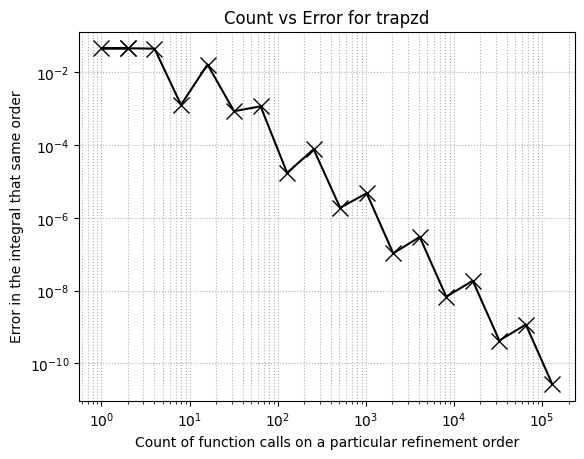

In [13]:
plt.loglog(count_trap, err_trap, marker='x',markersize=12,color='black')
plt.grid(which='both', linestyle=':', linewidth=0.8)
plt.minorticks_on()
plt.xlabel("Count of function calls on a particular refinement order")
plt.ylabel("Error in the integral that same order")
plt.title("Count vs Error for trapzd")
plt.show()

## Using qromb to investigate Romberg integration

In [14]:
# using qromb to integrate the function over [0,20] 

val,_,calls = r.qromb(integrand,0,20,1e-10)
print("The value of the integral : ", val)
print("Error : ", abs(val-exact))
print("Number of calls : ", calls)

The value of the integral :  0.04603886012372043
Error :  1.5614409071273982e-10
Number of calls :  524289


In [15]:
# plotting err vs num_calls for qromb

err_qromb = []
count_qromb = []
for i in range(-1,-11,-1):
    s,er,count = r.qromb(integrand,0,20,10**i)
    err_qromb.append(np.abs(s-exact))
    count_qromb.append(count)

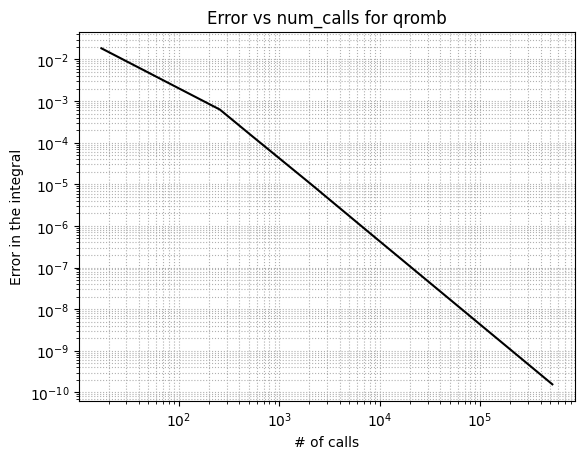

In [16]:
plt.loglog(count_qromb, err_qromb, color='black')
plt.grid(which='both', linestyle=':', linewidth=0.8)
plt.title("Error vs num_calls for qromb")
plt.xlabel("# of calls")
plt.ylabel("Error in the integral")
plt.show()

## Splitting the integral into (0,1) and (1,20)

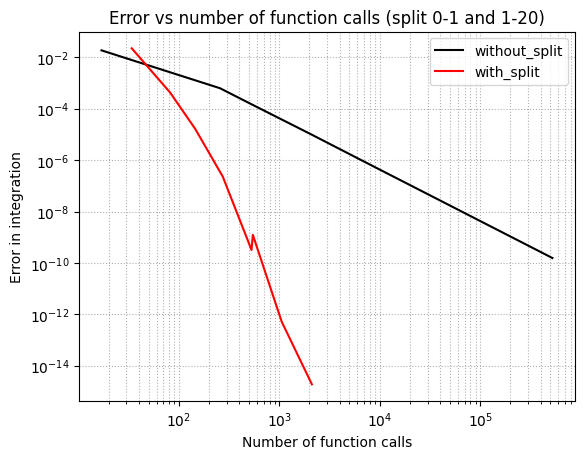

In [17]:
count_qromb_split=[]
err_qromb_split=[]

for i in range(-1,-11,-1):
    x1=r.qromb(integrand,0,1,10**i)
    x2=r.qromb(integrand,1,20,10**i)
    count_qromb_split.append(x1[2]+x2[2])
    err_qromb_split.append(abs(x1[0]+x2[0]-exact))

plt.loglog(count_qromb, err_qromb, color='black')
plt.loglog(count_qromb_split, err_qromb_split, color='red')
plt.title("Error vs number of function calls (split 0-1 and 1-20)")
plt.xlabel("Number of function calls")
plt.ylabel("Error in integration")
plt.grid(which='both', linestyle=':', linewidth=0.8)
plt.legend(["without_split", "with_split"])
plt.show()

## Python program that implements qromb using trapzd and polint

In [18]:
def qromb(integrand,a,b,order):
    global count
    s,xx,yy = 0,[],[]
    for i in range(1,order+1):
        s = r.trapzd(integrand, a, b, s, i)
        xx.append(((b-a)/(2**(i-1)))**2)
        yy.append(s)
    y,err = r.polint(xx,yy,0)
    return y,err

In [19]:
count = 0
y,err = qromb(integrand,0,20,20)
print("The value of integral : ",y)
print("The error in the integral : ",abs(y-exact))
print("Count of function calls : ",count)

The value of integral :  0.04603886012270183
The error in the integral :  1.571626925822578e-10
Count of function calls :  524289


## Varying the order of qromb to see # of calls for a fixed error of 10^-8

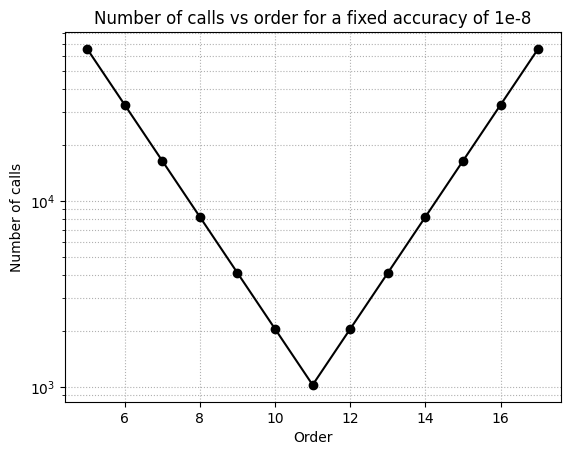

In [20]:
calls_arr = []
for order in range(5,18):
    _,_,num_calls = r.qromb(integrand, 0, 20, k=order, eps=1e-8)
    calls_arr.append(num_calls)

plt.semilogy(range(5,18),calls_arr, color='black',marker='o')
plt.title("Number of calls vs order for a fixed accuracy of 1e-8")
plt.xlabel("Order")
plt.ylabel("Number of calls")
plt.grid(which='both', linestyle=':', linewidth=0.8)
plt.show()

## Using spline interpolation to improve over trapezoid integration

In [21]:
err_splint = []
for i in range(4,20):
    x = np.linspace(0,20,2**i)
    y = [integrand(xi) for xi in x]
    tck = sp.interpolate.splrep(x,y)
    I = sp.interpolate.splint(0,20,tck)
    err_splint.append(abs(I-exact))

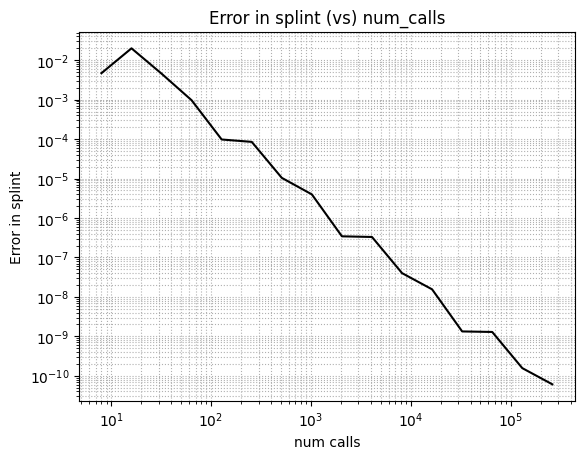

In [22]:
plt.loglog([2**i for i in range(3,19)],err_splint, c='black')
plt.title("Error in splint (vs) num_calls")
plt.xlabel("num calls")
plt.ylabel("Error in splint")
plt.grid(which='both', linestyle=':', linewidth=0.8)
plt.show()

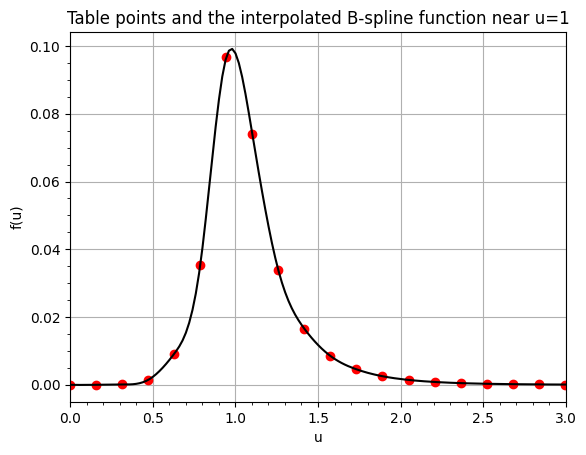

In [23]:
x = np.linspace(0,20,2**7)
y = [integrand(xi) for xi in x]
tck = sp.interpolate.splrep(x,y)
xx = np.linspace(0,20,1000)
yy = sp.interpolate.splev(xx, tck)
plt.plot(x,y,"ro",xx,yy,'black')
plt.grid()
plt.minorticks_on()
plt.title("Table points and the interpolated B-spline function near u=1")
plt.xlabel("u")
plt.ylabel("f(u)")
plt.xlim([0,3])
plt.show()

## Splitting the integral into 2 parts (0,1) and (1,20) and using splint

In [24]:
err_splint_split = []
num_points = [(ceil((1/21)*2**i), floor((20/21)*2**i)) for i in range(6,20)]
for n_tup in num_points:
    x1 = np.linspace(0,1,n_tup[0])
    x2 = np.linspace(1,20,n_tup[1])
    y1 = [integrand(xi) for xi in x1]
    y2 = [integrand(xi) for xi in x2]
    tck1 = sp.interpolate.splrep(x1,y1)
    tck2 = sp.interpolate.splrep(x2,y2)
    I1 = sp.interpolate.splint(0,1,tck1)
    I2 = sp.interpolate.splint(1,20,tck2)
    err_splint_split.append(abs(I1+I2-exact))

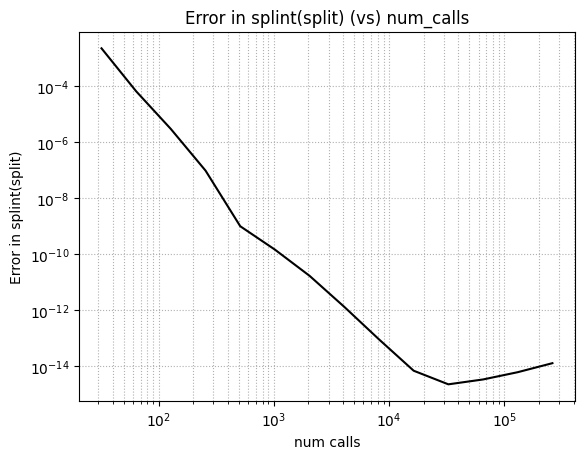

In [25]:
plt.loglog([2**i for i in range(5,19)],err_splint_split, c='black')
plt.title("Error in splint(split) (vs) num_calls")
plt.xlabel("num calls")
plt.ylabel("Error in splint(split)")
plt.grid(which='both', linestyle=':', linewidth=0.8)
plt.show()

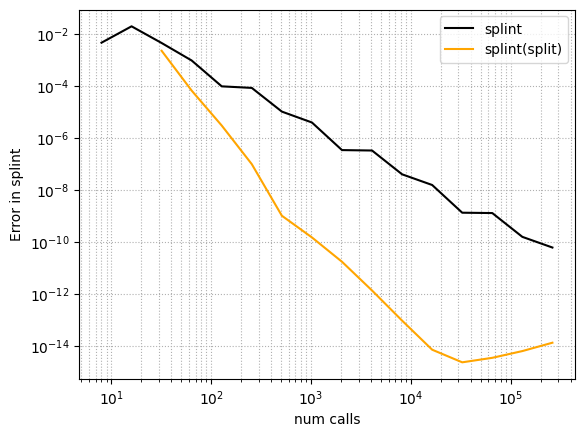

In [26]:
# comparison between before and after split for splint
plt.loglog([2**i for i in range(3,19)],err_splint, c='black')
plt.loglog([2**i for i in range(5,19)],err_splint_split, c='orange')
plt.legend(['splint','splint(split)'])
plt.xlabel('num calls')
plt.ylabel('Error in splint')
plt.grid(which='both', linestyle=':', linewidth=0.8)
plt.show()

## Using 3-point trapzd for qromb

In [27]:
def trapzd3(func, a, b, n):
    if(n==1):
        return 0.5*(b-a)*(func(a)+func(b))
    else:
        d = (float)(b-a)/3**(n-1)
        sum=0.5*d*(func(a)+func(b))
        x=a+d
        while(x<b):
            sum+=func(x)*d
            x+=d
        return sum

In [28]:
count_trap3 = [2] + [2*3**(i-2)for i in range(2,14)]

for i in range(1,14):
    s=trapzd3(integrand,0,20,i)
    count=0
    s1=r.trapzd(integrand,0,20,s,i)
    print("%1d %.15f %.2e %1d %.15f %.2e %1d"%(i,s,np.abs(s-exact),count_trap3[i-1],s1,np.abs(s1-exact),count))

1 0.000000000000000 4.60e-02 2 0.000000000000000 4.60e-02 2
2 0.000000023075799 4.60e-02 2 0.000000011546283 4.60e-02 1
3 0.001747920558422 4.43e-02 6 0.000875249558342 4.52e-02 2
4 0.028194200579779 1.78e-02 18 0.014884432892590 3.12e-02 4
5 0.050999611143388 4.96e-03 54 0.069857144998395 2.38e-02 8
6 0.046230660942806 1.92e-04 162 0.030261353630181 1.58e-02 16
7 0.045997292639350 4.16e-05 486 0.055135169145362 9.10e-03 32
8 0.046035384900749 3.48e-06 1458 0.044437900497297 1.60e-03 64
9 0.046039619585962 7.59e-07 4374 0.046641583447310 6.03e-04 128
10 0.046038888020242 2.77e-08 13122 0.045952928940489 8.59e-05 256
11 0.046038853923642 6.36e-09 39366 0.046079392702274 4.05e-05 512
12 0.046038859748375 5.31e-10 118098 0.046033125115824 5.74e-06 1024
13 0.046038860395577 1.16e-10 354294 0.046041358527193 2.50e-06 2048


In [29]:
def qromb3(integrand,a,b,order):
    s,xx,yy = 0,[],[]
    for i in range(1,order+1):
        s = trapzd3(integrand, a, b, i)
        xx.append(((b-a)/(3**(i-1)))**2)
        yy.append(s)
    y,err = r.polint(xx,yy,0)
    return y,err

In [38]:
err_romb2 = []
for order in range(3,15):
    y,_ = qromb(integrand,0,20,order)
    err_romb2.append(abs(y-exact))

In [30]:
err_romb3 = []
for order in range(3,15):
    y,_ = qromb3(integrand,0,20,order)
    err_romb3.append(abs(y-exact))

$\texttt{qromb3}$ of order n uses $\texttt{trapzd3}$ n times each time with order 1,2,$\ldots$,n. The extra number of func call required in order i, if $\texttt{trapzd3}$ were to be implemented optimally is $2\times 3^{i-2}$. Therefore the total number func calls in $\texttt{qromb3}$ of order n is $3^{n-1}+1$

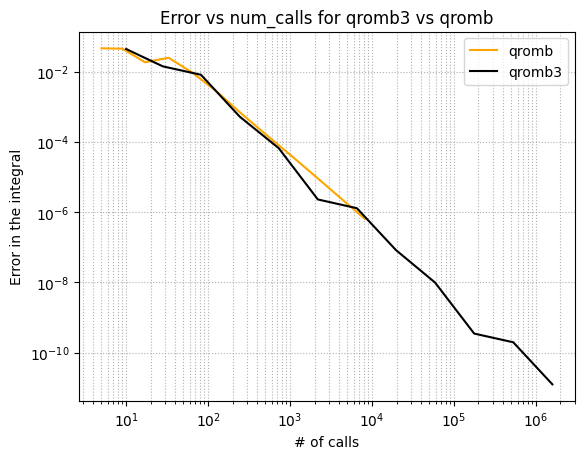

In [39]:
num_calls3 = [(3**(i-1) + 1) for i in range(3,15)]
num_calls2 = [(2**(i-1) + 1) for i in range(3,15)]
plt.loglog(num_calls2,err_romb2,color='orange')
#plt.loglog(count_qromb, err_qromb, color='orange')
plt.loglog(num_calls3,err_romb3,color='black')
plt.grid(which='both', linestyle=':', linewidth=0.8)
plt.title("Error vs num_calls for qromb3 vs qromb")
plt.xlabel("# of calls")
plt.ylabel("Error in the integral")
plt.legend(["qromb","qromb3"])
plt.show()

## Comparison

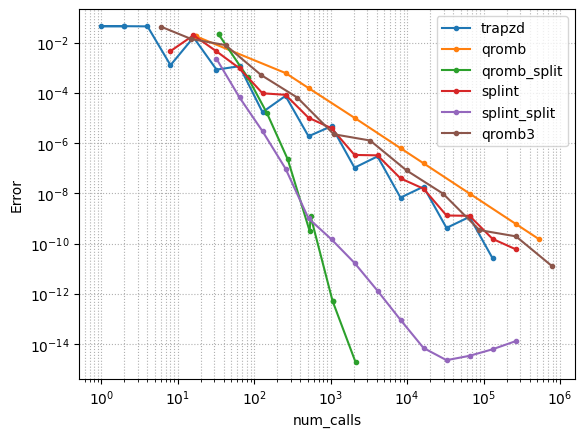

In [32]:
plt.loglog(count_trap, err_trap, label='trapzd',marker='o',markersize=3)
plt.loglog(count_qromb, err_qromb, label='qromb',marker='o',markersize=3)
plt.loglog(count_qromb_split, er r_qromb_split, label='qromb_split',marker='o',markersize=3)
plt.loglog([2**i for i in range(3,19)],err_splint, label='splint',marker='o',markersize=3)
plt.loglog([2**i for i in range(5,19)],err_splint_split, label='splint_split',marker='o',markersize=3)
plt.loglog(num_calls3,err_romb3, label='qromb3',marker='o',markersize=3)
plt.grid(which='both', linestyle=':', linewidth=0.8)
plt.xlabel('num_calls')
plt.ylabel('Error')
plt.legend()
plt.show()